In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df=pd.read_csv("/content/drive/MyDrive/Documents/python and ml/kc_house_data.csv")
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,zipcode
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,98178
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,98125
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,98028
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,98136
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,98074
...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,3,8,1530,0,98103
21609,400000.0,4,2.50,2310,5813,2.0,3,8,2310,0,98146
21610,402101.0,2,0.75,1020,1350,2.0,3,7,1020,0,98144
21611,400000.0,3,2.50,1600,2388,2.0,3,8,1600,0,98027


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   condition      21613 non-null  int64  
 7   grade          21613 non-null  int64  
 8   sqft_above     21613 non-null  int64  
 9   sqft_basement  21613 non-null  int64  
 10  zipcode        21613 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1.8 MB
None


In [34]:
df.shape

(21613, 11)

In [35]:
df.nunique()

price            3625
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
condition           5
grade              12
sqft_above        946
sqft_basement     306
zipcode            70
dtype: int64

In [36]:
df.isnull()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,zipcode
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,False


In [37]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
grade            0
sqft_above       0
sqft_basement    0
zipcode          0
dtype: int64

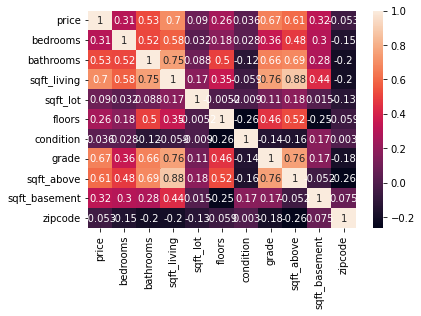

In [10]:
correlations = df.corr()
sns.heatmap(correlations, annot=True)

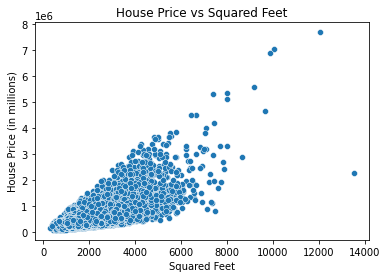

In [11]:
plt.title("House Price vs Squared Feet")
plt.xlabel("Squared Feet")
plt.ylabel("House Price (in millions)")
sns.scatterplot(x='sqft_living', y='price', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


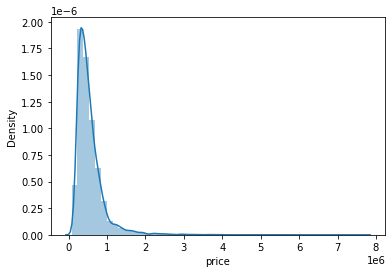

In [31]:
sns.distplot(df['price'])

In [32]:
sns.pairplot(df)

In [12]:
# Import the module train_test_split
from sklearn.model_selection import train_test_split
# Define our predictor and target variables
X = df[['sqft_living']]
Y = df['price']
# Create four groups using train_test_split. By default, 75% of data is assigned to train, the other 25% to test.
x_train, x_test, y_train, y_test = train_test_split(X, Y)

-57755.59826998005
[288.34605281]


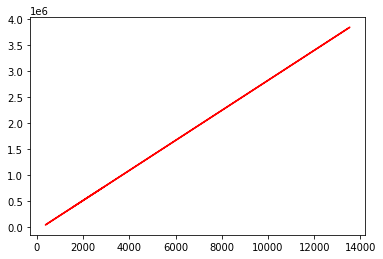

In [13]:
# Import the library
from sklearn.linear_model import LinearRegression
# Initialize a linear regression model object
lr = LinearRegression() 
# Fit the linear regression model object to our data
lr.fit(x_train, y_train)
# Print the intercept and the slope of the model
print(lr.intercept_) 
print(lr.coef_) 
# Show line of best fit
plt.plot(x_train, lr.coef_*x_train + lr.intercept_, '-r', label='Intercept: -39,163 \nSlope: 279.4')

In [21]:
y_pred = lr.predict(x_test)

In [22]:
y_pred

array([ 614090.70477038,  495868.8231195 , 1144647.4419353 , ...,
        233473.91506511,  501635.74417564,  922620.9812739 ])

In [23]:
y_test

20248     453000.0
3226      299000.0
21593    1090000.0
18903     435000.0
1293      550000.0
           ...    
542       318888.0
21606    1010000.0
11536     550000.0
3148      781000.0
11335     515000.0
Name: price, Length: 5404, dtype: float64

In [24]:
lr.score(x_train,y_train)

0.4937684798302926

In [25]:
lr.score(x_test,y_test)

0.48661738169732094

(array([7.5690e+03, 1.0681e+04, 2.8140e+03, 4.4100e+02, 7.7000e+01,
        2.4000e+01, 2.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  290.,  1615.,  2940.,  4265.,  5590.,  6915.,  8240.,  9565.,
        10890., 12215., 13540.]),
 <a list of 10 Patch objects>)

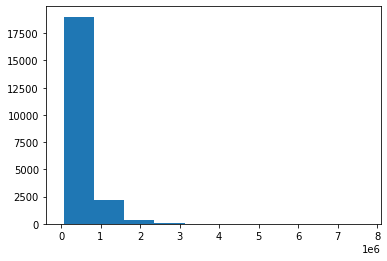

In [29]:
plt.hist(df['price'])

(array([7.5690e+03, 1.0681e+04, 2.8140e+03, 4.4100e+02, 7.7000e+01,
        2.4000e+01, 2.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  290.,  1615.,  2940.,  4265.,  5590.,  6915.,  8240.,  9565.,
        10890., 12215., 13540.]),
 <a list of 10 Patch objects>)

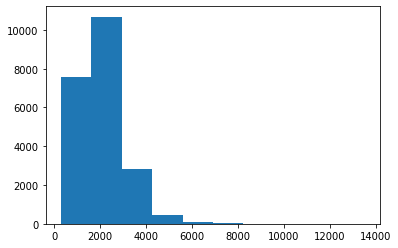

In [30]:
plt.hist(df['sqft_living'])

In [28]:
from sklearn.metrics import mean_squared_error
error = print("MSE", mean_squared_error(y_test,y_pred))

MSE 54299232156.40803
